# 音樂學習參考文章實作

## 前言
對於音訊訓練的研究方法目前還沒有方向,

因此以下為參考網路相關文章實作結果, 

先理解研究的前後方向,從中學習或借鏡, 

未來對於聲音學習較有方向研究,

#### import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# 將音檔轉換成數字

In [ ]:
signal,sample_rate = librosa.load("test.wav")

In [ ]:
# 一個連續的音訊數列
signal

In [ ]:
# sample_rate 就是每秒鐘對這個聲音訊號取樣的次數
sample_rate

# 轉換成頻譜圖

### Librosa 的 specshow

In [ ]:
#把信號做傅立葉變換再取DB
X = librosa.stft(signal.astype(np.float32))
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7,4))
librosa.display.specshow(Xdb,sr=sample_rate,x_axis='time',y_axis='hz')
plt.colorbar()

### matplotlib 也有一樣的function

In [ ]:
plt.specgram(signal,Fs=sample_rate)
plt.xlabel('Time')
plt.ylabel('Frequency')

# 梅爾頻率

使用一般的聲音頻率的話，並不能夠很完美的符合人的聽覺感受，因此在1980年由 S.B. Davis和 Paul Mermelstein 提出了一種叫做梅爾刻度的一種非線性刻度單位(人類的聽覺非線性)，用以表示人耳實際上對音高變化的感受

定義是將 1000Hz，且高於 40 分貝以上的聲音信號，定做 1000 mel。

而在頻率 500Hz 以上時，人耳每感覺到等量的音高變化，所需要的頻率變化隨頻率增加而愈來愈大，如下圖所示。

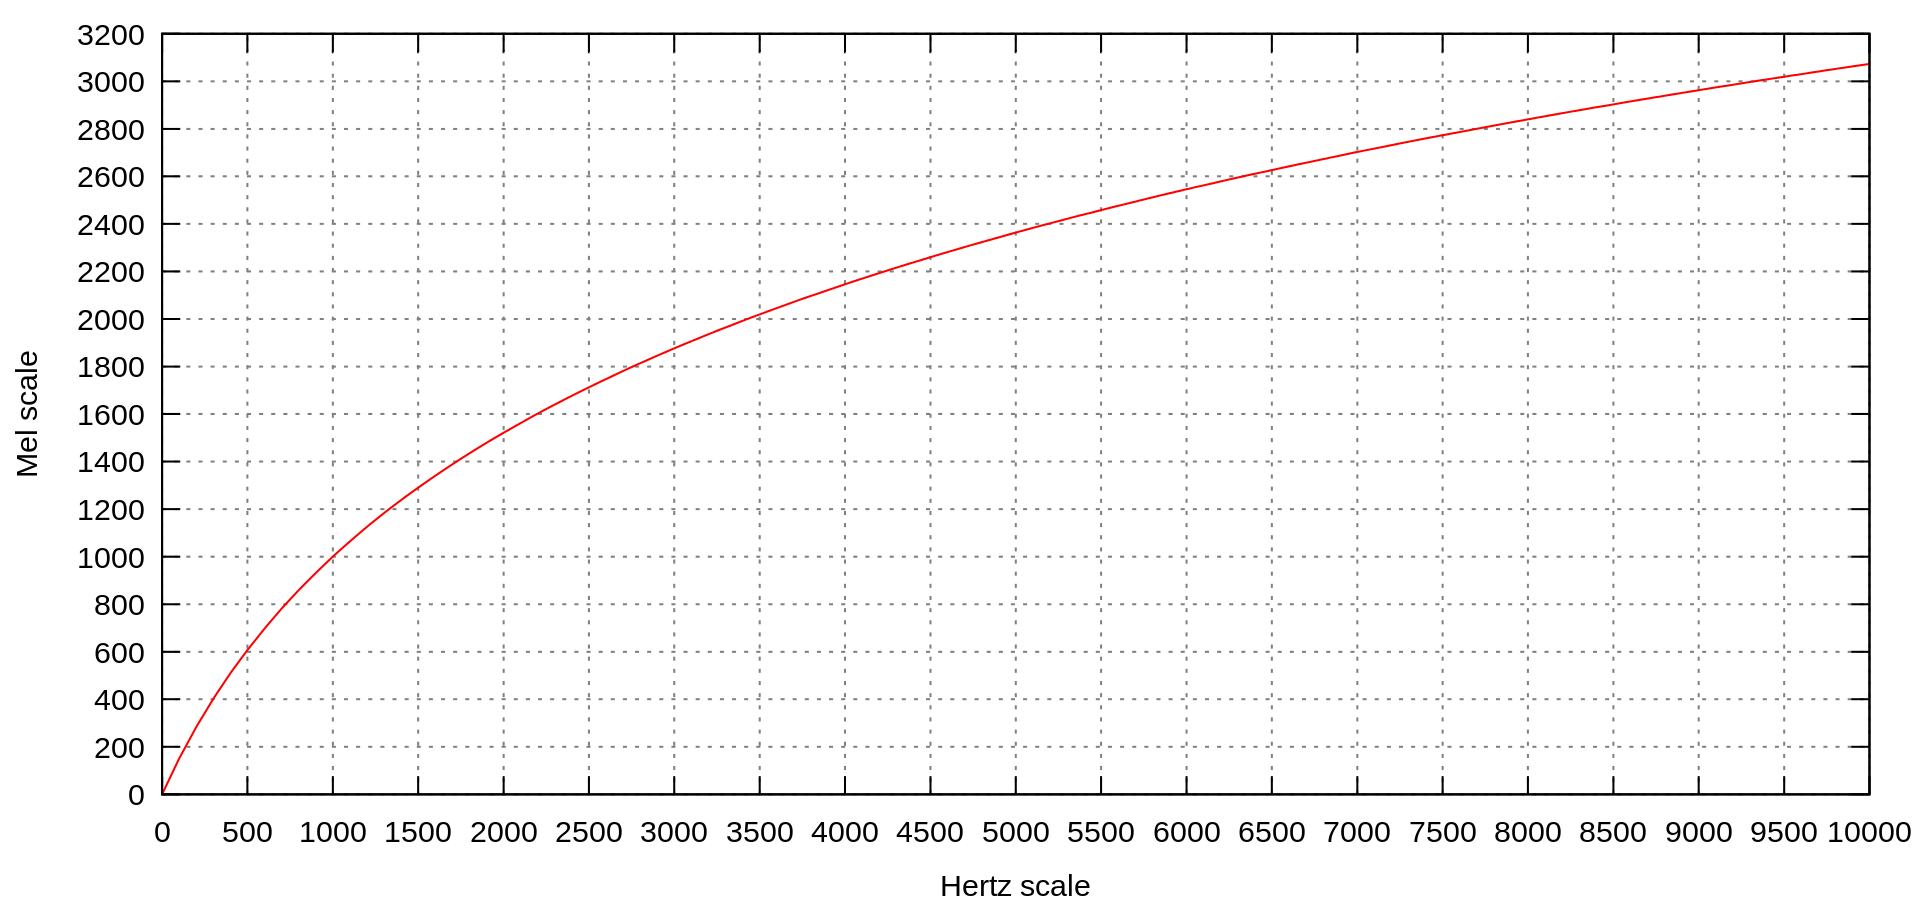

轉換公式如下：
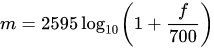
不一定數字要如同上面的公式一樣，歷史上也有一些人提出不同的參數，像是把 700 改成 1000。

# 梅爾倒頻譜

梅爾倒頻譜即是梅爾頻率與頻譜的結合

In [ ]:
# 梅爾倒頻譜的作法
spec = abs(librosa.stft(signal.astype(np.float32)))
mel = librosa.filters.mel(sample_rate,n_fft=2048,n_mels=128)
mel_spec = np.dot(mel,spec)
Xdb = librosa.amplitude_to_db(mel_spec)
plt.figure(figsize=(7,4))
librosa.display.specshow(Xdb,sr=sample_rate,x_axis='time',y_axis='hz')
plt.colorbar()

In [ ]:
# librosa 已經內建
mel_sp = librosa.feature.melspectrogram(signal,n_fft=2048)
plt.figure(figsize=(7,4))
librosa.display.specshow(Xdb,sr=sample_rate,x_axis='time',y_axis='hz')
plt.colorbar()


# 梅爾倒頻譜係數

一組用來建立梅爾倒頻譜的關鍵係數,  通常是 13維的資料, 取得係數的方法 librosa 以有內建, 若自己做的話需要把梅爾倒頻譜再做一次倒頻譜

In [ ]:
# 轉成梅爾倒頻譜係數
mfcc = librosa.feature.mfcc(signal,sr=sample_rate,n_mfcc=13)

In [ ]:
# 可以轉回梅爾倒頻譜
librosa.feature.inverse.mfcc_to_mel(mfcc)

# 過零率

指一個信號的正負號變化的比率, 這個特徵在音樂分類的任務上是敲擊聲的關鍵特徵

In [ ]:
# 過零率計算
z_r=librosa.feature.zero_crossing_rate(signal)
np.sum(z_r)/len(z_r[0])

# 頻譜質心
可以用來表達每個音框的頻率分布以及趨勢, 每個音框都會計算出一個特徵值,
音框: 分析一段聲音時, 通常將音訊切分成比較短的單位, 即音框
此值越低, 則越多的能量在低頻, 反之亦然

In [ ]:
s_c = librosa.feature.spectral_centroid(signal)
np.sum(s_c)/len(s_c[0])

# Data Preprocessing

GTZAN dataset 已經把 feature萃取出來, 還會有兩個 csv檔, feature_3_sec.csv 與 feature_30_sec.csv ,使用它提供的 csv檔即可

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('./csv/Data/features_3_sec.csv')
data.head()

#(9990,60)
data.shape

# 移除檔名欄位
data=data.drop(labels='filename',axis=1)

# 最後一欄是類別(str)
class_list=data.iloc[:,-1]

# 用 LabelEncoder 幫我們把類別編碼
convert = LabelEncoder()
y = convert.fit_transform(class_list)
print(y)

x= data.iloc[:,:-1]
x

[0 0 0 ... 9 9 9]


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


把餵進去的 feature data 常態分布化, 這樣平均值會變成0, 標準差變為 1, 使離群值影響降低

In [2]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(x,dtype=float))

再切分成 train, valid 兩分 data

In [3]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=0.2)
print(len(Y_train),len(y_test))

7992 1998


FCN 模型建立

In [9]:
X_train.shape

(7992, 58)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(
    [
        Dense(512,input_shape=(X_train.shape[1],),activation='relu'),
        Dense(256,activation='relu'),
        Dense(128,activation='relu'),
        Dense(64,activation='relu'),
        Dense(10,activation='softmax')
    ]
)
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 203,338
Trainable params: 203,338
Non-trainable params: 0
_________________________________________________________________


開始訓練

In [5]:
history = model.fit(
            X_train,
            Y_train,
            validation_data=(x_test,y_test),
            epochs = 600,
            batch_size=128
)

Epoch 1/600
63/63 [==============================] - 13s 21ms/step - loss: 1.2678 - accuracy: 0.5618 - val_loss: 0.9254 - val_accuracy: 0.6737
Epoch 2/600
63/63 [==============================] - 1s 13ms/step - loss: 0.7346 - accuracy: 0.7447 - val_loss: 0.7188 - val_accuracy: 0.7543
Epoch 3/600
63/63 [==============================] - 1s 13ms/step - loss: 0.5432 - accuracy: 0.8133 - val_loss: 0.6257 - val_accuracy: 0.7908
Epoch 4/600
63/63 [==============================] - 1s 13ms/step - loss: 0.4324 - accuracy: 0.8522 - val_loss: 0.5663 - val_accuracy: 0.8088
Epoch 5/600
63/63 [==============================] - 1s 12ms/step - loss: 0.3224 - accuracy: 0.8949 - val_loss: 0.5337 - val_accuracy: 0.8188
Epoch 6/600
63/63 [==============================] - 1s 13ms/step - loss: 0.2573 - accuracy: 0.9162 - val_loss: 0.4624 - val_accuracy: 0.8504
Epoch 7/600
63/63 [==============================] - 1s 13ms/step - loss: 0.1969 - accuracy: 0.9386 - val_loss: 0.4661 - val_accuracy: 0.8468
Epoch

63/63 [==============================] - 1s 13ms/step - loss: 0.0030 - accuracy: 0.9986 - val_loss: 0.5306 - val_accuracy: 0.9099
Epoch 116/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0020 - accuracy: 0.9987 - val_loss: 0.5436 - val_accuracy: 0.9089
Epoch 117/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0021 - accuracy: 0.9989 - val_loss: 0.5340 - val_accuracy: 0.9129
Epoch 118/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0019 - accuracy: 0.9985 - val_loss: 0.5352 - val_accuracy: 0.9134
Epoch 119/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0018 - accuracy: 0.9987 - val_loss: 0.5376 - val_accuracy: 0.9159
Epoch 120/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0018 - accuracy: 0.9989 - val_loss: 0.5453 - val_accuracy: 0.9144
Epoch 121/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0018 - accuracy: 0.9986 - val_loss: 0.5525 - val_accuracy: 0.9114
Epoch 

Epoch 172/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0017 - accuracy: 0.9982 - val_loss: 0.6586 - val_accuracy: 0.9094
Epoch 173/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0016 - accuracy: 0.9986 - val_loss: 0.6593 - val_accuracy: 0.9079
Epoch 174/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0016 - accuracy: 0.9990 - val_loss: 0.6691 - val_accuracy: 0.9119
Epoch 175/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0016 - accuracy: 0.9985 - val_loss: 0.6655 - val_accuracy: 0.9104
Epoch 176/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0015 - accuracy: 0.9987 - val_loss: 0.6664 - val_accuracy: 0.9104
Epoch 177/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9987 - val_loss: 0.6738 - val_accuracy: 0.9104
Epoch 178/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0016 - accuracy: 0.9989 - val_loss: 0.6724 - val_accuracy:

Epoch 229/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0016 - accuracy: 0.9982 - val_loss: 0.6205 - val_accuracy: 0.9109
Epoch 230/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0016 - accuracy: 0.9985 - val_loss: 0.6215 - val_accuracy: 0.9114
Epoch 231/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0016 - accuracy: 0.9985 - val_loss: 0.6256 - val_accuracy: 0.9084
Epoch 232/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0018 - accuracy: 0.9986 - val_loss: 0.6157 - val_accuracy: 0.9119
Epoch 233/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0018 - accuracy: 0.9989 - val_loss: 0.6205 - val_accuracy: 0.9114
Epoch 234/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0020 - accuracy: 0.9989 - val_loss: 0.6227 - val_accuracy: 0.9119
Epoch 235/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.7427 - val_accuracy:

Epoch 286/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0015 - accuracy: 0.9990 - val_loss: 0.7087 - val_accuracy: 0.9124
Epoch 287/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0016 - accuracy: 0.9985 - val_loss: 0.7126 - val_accuracy: 0.9099
Epoch 288/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9990 - val_loss: 0.7109 - val_accuracy: 0.9124
Epoch 289/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9990 - val_loss: 0.7158 - val_accuracy: 0.9119
Epoch 290/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0015 - accuracy: 0.9990 - val_loss: 0.7214 - val_accuracy: 0.9104
Epoch 291/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0015 - accuracy: 0.9985 - val_loss: 0.7241 - val_accuracy: 0.9094
Epoch 292/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9987 - val_loss: 0.7249 - val_accuracy:

Epoch 343/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9987 - val_loss: 0.6320 - val_accuracy: 0.9124
Epoch 344/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0015 - accuracy: 0.9987 - val_loss: 0.6341 - val_accuracy: 0.9134
Epoch 345/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9989 - val_loss: 0.6384 - val_accuracy: 0.9139
Epoch 346/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9989 - val_loss: 0.6429 - val_accuracy: 0.9129
Epoch 347/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9989 - val_loss: 0.6479 - val_accuracy: 0.9134
Epoch 348/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9990 - val_loss: 0.6516 - val_accuracy: 0.9134
Epoch 349/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9989 - val_loss: 0.6562 - val_accuracy:

Epoch 400/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9990 - val_loss: 0.8175 - val_accuracy: 0.9119
Epoch 401/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9990 - val_loss: 0.8258 - val_accuracy: 0.9114
Epoch 402/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9989 - val_loss: 0.8358 - val_accuracy: 0.9119
Epoch 403/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9986 - val_loss: 0.8478 - val_accuracy: 0.9114
Epoch 404/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9992 - val_loss: 0.8557 - val_accuracy: 0.9119
Epoch 405/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9985 - val_loss: 0.8481 - val_accuracy: 0.9119
Epoch 406/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9986 - val_loss: 0.8542 - val_accuracy:

Epoch 457/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0014 - accuracy: 0.9986 - val_loss: 0.8142 - val_accuracy: 0.9094
Epoch 458/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9990 - val_loss: 0.8610 - val_accuracy: 0.9069
Epoch 459/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9987 - val_loss: 0.9161 - val_accuracy: 0.9079
Epoch 460/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9989 - val_loss: 0.9458 - val_accuracy: 0.9089
Epoch 461/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9987 - val_loss: 0.9749 - val_accuracy: 0.9104
Epoch 462/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9989 - val_loss: 0.9939 - val_accuracy: 0.9099
Epoch 463/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9989 - val_loss: 1.0335 - val_accuracy:

Epoch 514/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0016 - accuracy: 0.9987 - val_loss: 0.5664 - val_accuracy: 0.9199
Epoch 515/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9985 - val_loss: 0.5726 - val_accuracy: 0.9209
Epoch 516/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0016 - accuracy: 0.9986 - val_loss: 0.5766 - val_accuracy: 0.9194
Epoch 517/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0015 - accuracy: 0.9986 - val_loss: 0.5841 - val_accuracy: 0.9194
Epoch 518/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0016 - accuracy: 0.9986 - val_loss: 0.6027 - val_accuracy: 0.9209
Epoch 519/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9987 - val_loss: 0.6578 - val_accuracy: 0.9204
Epoch 520/600
63/63 [==============================] - 1s 12ms/step - loss: 0.0025 - accuracy: 0.9986 - val_loss: 0.6881 - val_accuracy:

Epoch 571/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9990 - val_loss: 1.1997 - val_accuracy: 0.9174
Epoch 572/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9990 - val_loss: 1.1991 - val_accuracy: 0.9184
Epoch 573/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.9984 - val_loss: 1.1988 - val_accuracy: 0.9179
Epoch 574/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9987 - val_loss: 1.2114 - val_accuracy: 0.9189
Epoch 575/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9987 - val_loss: 1.2217 - val_accuracy: 0.9189
Epoch 576/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9985 - val_loss: 1.2241 - val_accuracy: 0.9189
Epoch 577/600
63/63 [==============================] - 1s 13ms/step - loss: 0.0014 - accuracy: 0.9987 - val_loss: 1.2277 - val_accuracy:

查看 loss 

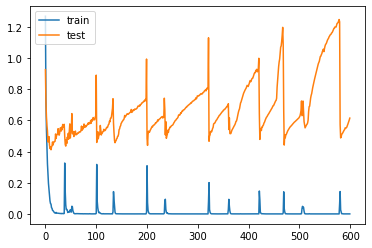

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

以這個資料及來說一段音樂用了60個 feature, 也就是說如果想要試在其他音樂上就必須生出 60個 feature, 若用較少的feature做訓練, 載這個model的效果就會開始變差,
至少證明:聲音的 feature 是可以讓機器來區別音樂種類

# 在領域裡面遭遇虛數

目前用來訓練的資料, 都是在領域裡面的資料, 所以模型預測出來的必然會是頻譜

取 feature的時候已經做了傅立葉轉換, 但出來的結果是一個複數, 所以取 abs(絕對值)

如果用複數訓練model,即便讓 weight 跟 bias 也變成了複數型態, 遇到激活函數的時候, 根據 劉維定理, 這些有界的激活函數在複數平面上是常數, 也就是說他們是線性的, 所以當他們在複數平面上的時候就會有奇異點(不可微分的點), 會造成函數往無窮大增長
重新設計激活函數也無法避免無限增長, 即使設定條件讓激活函數搜尋部分的空間防止無限生長, 也還有邊界與其他問題需要注意, 付出的運算成本跟得到的結果不成比例

# Griffin Lim 演算法

如果信號不只看一幀, 而是看連續的信號, 則當左右的信號幅度不同, 是否就說明了這樣的相位是錯誤的, 假設幅度變化是有規律, 那麼相位就必定也會滿足某種桂率, 例如三角波, 從一幀來看每個相位都是可以的, 但如果要保證相鄰的波型幅度正確, 那麼每幀的相位就會有規律, 也因為如此假設, 所以如果訊號波幅大也會使這種算法失靈

In [1]:
import librosa
import numpy as np
from IPython.display import Audio

sig,sr = librosa.load('test.wav')
sig = sig[:50000]
sig
# 播放原始音訊
Audio(sig,rate=sr)

In [2]:
# 定義一些參數 (後面補充說明)
window='han'
hop_length = 256
n_fft=2048
spec = librosa.feature.melspectrogram(sig,n_fft=n_fft,hop_length=hop_length,window=window)
# 直接 call 函式來轉回 stft , 注意: 這裡已經取過 abs 後的值
spec = librosa.feature.inverse.mel_to_stft(spec)
spec

C:\Users\jason\AppData\Local\Temp/ipykernel_21036/2188379542.py:5: FutureWarning: Pass y=[ 9.1552734e-05  2.1362305e-04  0.0000000e+00 ... -2.5634766e-03
  2.1453857e-02 -4.6386719e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec = librosa.feature.melspectrogram(sig,n_fft=n_fft,hop_length=hop_length,window=window)


array([[6.47761400e-10, 1.28111877e-09, 1.84409144e-09, ...,
        0.00000000e+00, 1.50965036e-08, 2.03788240e-08],
       [8.51150900e-02, 9.42376778e-02, 9.93307680e-02, ...,
        2.61802047e-01, 2.05299363e-01, 1.42897561e-01],
       [1.20370917e-01, 1.33272201e-01, 1.40474916e-01, ...,
        3.70243996e-01, 2.90337145e-01, 2.02087656e-01],
       ...,
       [3.01476510e-04, 4.11685935e-04, 4.46928490e-04, ...,
        1.52757287e-01, 1.34221122e-01, 9.43093523e-02],
       [2.13176099e-04, 2.91105913e-04, 3.16026155e-04, ...,
        1.08015716e-01, 9.49086696e-02, 6.66867867e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

定義自己的 griffin lim , 主要還是參考 librosa 的寫法

In [3]:
def grifflim(S,n_iter=100,hop_length=hop_length,window='han'):
    n_fft = 2*(S.shape[0]-1)
    # 初始化角度
    angles = np.empty(S.shape,dtype=np.complex64)
    angles = np.exp(2*np.pi*np.random.rand(*S.shape))
    
    #紀錄重建之後的結果
    rebuilt = 0.0
    
    for _ in range(n_iter):
        # 紀錄前一個重建之後的結果
        tprev = rebuilt
        
        # 把現在的訊號轉回去
        inverse = librosa.istft(S*angles, hop_length=hop_length)
        
        #再轉回來
        rebuilt = librosa.stft(inverse,n_fft=n_fft,hop_length=hop_length)
        
        #更新角度
        angles = rebuilt -tprev
        angles /= np.abs(angles)
        
    return librosa.istft(S*angles,hop_length=hop_length,window=window)

試聽重建之後的水平

In [4]:
sig_after=grifflim(spec)
Audio(sig_after,rate=sr)

使用 librosa 內建的函數

In [5]:
M=librosa.griffinlim(spec)
# 可以勝去轉乘 stft
librosa.feature.inverse.mel_to_audio(spec)

C:\Users\jason\AppData\Roaming\Python\Python38\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


array([ 0.00290717,  0.00185484, -0.00493784, ..., -0.00224898,
        0.04554843, -0.05687396], dtype=float32)

自定義的好處是更新角度的部分可以用別的做法, 也可以更改 n_iter次數, librosa 只做了32次, 結果會有嚴重機械因
也有人將這部分交給模型處理, 這種模型稱為 Vocoder

## 小結
使用 griffin lim 可以讓 mel 重新轉回 wav , 即使是一種傳統的演算法但依然有效

# 窗函式, n_fft, hop_length 

在做 melspectrogram 的時候是有一些參數可以設定的

In [7]:
spec = librosa.feature.melspectrogram(sig,n_fft=2048,hop_length=256,window='hann')

C:\Users\jason\AppData\Local\Temp/ipykernel_21036/1459910169.py:1: FutureWarning: Pass y=[ 9.1552734e-05  2.1362305e-04  0.0000000e+00 ... -2.5634766e-03
  2.1453857e-02 -4.6386719e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec = librosa.feature.melspectrogram(sig,n_fft=2048,hop_length=256,window='hann')


如前面所講到, 真正在取 spectrogram的時候, 並不是單純的只做 STFT, 在做STFT之前還會做一些操作
1. 預強調(Pre-emphasis)
2. 音框化(Frame Blocking)
3. 乘上窗函式(window)

## 預強調

將語音訊號 s(n) 通過一個高通濾波器

H(z) = 1-a*z where 0.9<a<1.0

若以時域的運算式來表示, 預強調的訊號 s2(n) 就是

s2(n) = s(n)-a*s(n-1)

這樣處理是為了消除發聲過中聲帶與嘴唇的效應來補償語音信號受到發音系統壓抑的高頻部分,另一種說法是要突顯在高頻的共振峰

## 音框化

將 n 個取樣點集合乘一個觀測單位稱為音框(Frame),通常 n 的值是 256或 112,涵蓋的時間約為20~30ms

為了避免相鄰兩音框的變化過大, 會讓兩相鄰音框之間有一段重疊區域, 此重疊區域包含了 m個取樣點, 通常m 的值是 n 的一半或 1/3

假設所用的音訊的 sample rate 為 16 KHz 且音框長度為 256, 對應的時間長度就是 256/16000*1000=16ms

n_fft 指的就是這個 n值, 默認是2048 , 對應的 sample_rate 是 22.05KHz,是最適合處理音樂訊號的頻率

## 乘上窗函式

窗函數是一種除在給定區間之外取值均為0 的實函數, 任何函數與窗函數的乘積還是一個窗函數,

把每一個音框乘上窗函數(漢明窗,三角窗..等等)就可以增加音框左端和右端的連續性, 保持連續性的主要原因是因為在進行FFT時,都是假設一個音框內的訊號是代表一個週期性訊號, 如果這個週期性不存在, FFT是會為了要符合左右端不連續的變化, 而產生一些不存在原訊號的能量分布, 造成分析上的誤差

如果再取音框時已經確定音框中的訊號包含了基本週期的整數倍, 這時的音框左右端會是連續的, 就可以不用乘窗函數, 但在實作上基本週期的計算會需要額外的時間, 而且容易算錯,因此都用窗函式來達到類似效果

假設音框化的訊號為 S(n)

S(n), n=0,...,N-1

乘上 Hanning 窗 W(n)

(n) = S(n)*W(n)

其中 W(n) 形式如下:

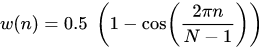

所以 window='hann'的意思就是使用 'Hanning'這個窗函式, 也可以使用其他窗函式, 在做完以上三步之後才會進行STFT

而 hop_length指的就是STFT的音頻樣本數, 預設值式 win_length//4 , 加窗之後的窗口長度, 默認式等於 n_fft的長度,假設現在的窗口長度是256, hop_length是250,那出來的結果就會變成兩個, 因為從251開始又被視為新的一幀

# 聲碼器(Vocoder)

合成語音的概念最早是由貝爾實驗室的工程師-Homer Dudley 在 1928年所提出, 並在 1939年的紐約世界博覽會首次展示了他取名為聲碼器的語音合成器

# WaveNet- 直接生成聲音訊號的神經網路

WaveNet 是由 DeepMind 的研究人員於 2016年9月的一篇論文中提出, 早在 WaveNet 出現之前也有人使用神經網路合成語音, 像是 Tacotron 可以生成聲音的時頻譜以及一些特徵參數, 但最後從頻域回到時域還是用了 Griffin-Lim 演算法, 而 wavenet1不用, 除此之外他除了可以用在語音合成之外, 也可用在音樂生成(GAN Music)以及語音辨識等其他領域, 其衍伸出來的 WaveNet_Vocoder 就是 Auto_VC 原本使用的Vocoder

# WaveNet的想法

WaveNet是源自於PixelCNN的想法, 如果一張圖 P(X)是由各項訴 {x1~xN}所組成,那一張圖片就可以說他的各個像素的聯合分布
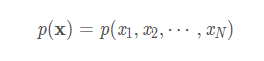
因此如果用條件分布的乘積來表示的話就可以寫成
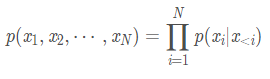
在生成圖片時就把前面的像素當作條件來逐點生成,把像素換成聲音訊號就是WaveNet在做的事情, 所以WaveNet要預測的目標其實是下一個聲音樣本點的機率分布

# WaveNet的資料前處理

聲音訊號通常是以16位元的整數儲存在電腦裡,直接用的話模型在每個時間點都要輸出65536(16^4)個機率來表示所有可能樣本點的機率分布,為了降低建模難度,WaveNet用 µ low演算法將輸入資料樣本量化成8位元,變成只有256種可能

# WaveNet的核心

WaveNet裡使用了膨脹因果卷積(Dilated Causal Convolution) 其中膨脹卷積增加了 Respective field,而因果卷積則確保了前後輸出的因果關係

# WaveNet的Activation Function

WaveNet中使用了與PixelCNN相同的Gated Activation Unit,這個東西就類似激活函數, 只是他是非線性的,在這裡使用會比單純做ReLU好,因為ReLU會把小於0的丟掉

In [ ]:
# 把輸入分別丟進 sigmoid跟 tanh, 然後把結果乘起來
def gate(x):
    res_sigmoid = sigmoid(x)
    res_tanh = tanh(x)
    res = Multiply([res_sigmoid,res_tanh])
    return res

# WaveNet的架構

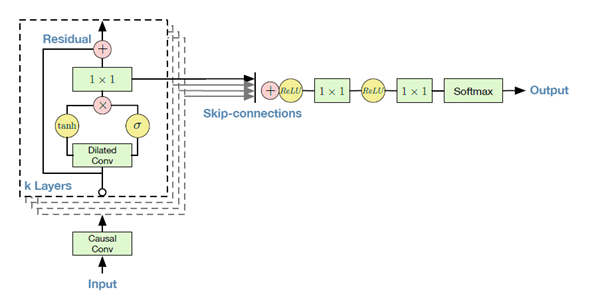
如上圖所示, 輸入經過因果卷積之後分別進入由膨脹卷積跟Gate Activation Unit所組成的Residual Block以及skip-connections,最後把所有結果加起來再過softmax就是輸出結果

In [ ]:
def residual_block(x,filters,kernel_size,rate):
    x = dilated_conv(filters,kernel_size,rate)(x)
    x=gate(x)
    x= conv_1D(32,1)(x) #最後的 [1*1]
    return x

# WaveNet做 Vocoder

前面提到用條件分布的乘積來表示一段聲音, 既然是條件分布,就代表還可以給額外條件, 現在在原本公式加上額外的條件h重寫如下:
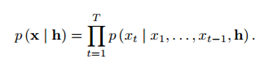
輸入的條件還可以有兩種形式分別是:

1.全域條件:

整個model都照條件去做, 加入之後Gated Activation Unit 變成
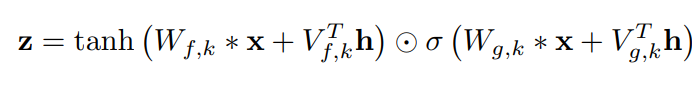

2.局部條件:

限定 model 在什麼時候才照條件去做, 加入之後Gated Activation Unit變成
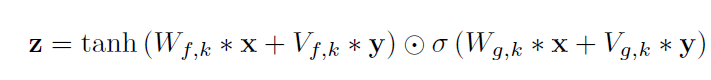

在 WaveNet局部條件的輸入原本是一個 Transpose Conv,他在文字轉語音(TTS)的做法是先訓練一個CNN的語音轉文字模型(h=F(y)),然後再把它Transpose回來(y=g(h)),通過這個將文字轉換成語音,但產出的語音品質不良, 所以不會直接使用,而是拿來當作局部條件的輸入, 而輸入的ground truth就是真正的語音

而這邊的Vf,k*y就是1x1 Conv, 它是拿來取代Transpose的,效果比較好

同 TTS的原理,你只要把局部條件換成語音特徵(mel)它就變成Vocoder
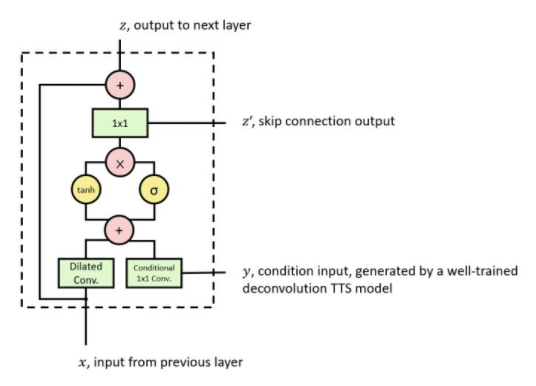

筆者完整demo連結 : https://github.com/licaiwang/wavenet_tensorflow_2.0

Deep Mind 並沒有釋出他們官方的 Code,不過坊間有不少 implement:
https://paperswithcode.com/paper/wavenet-a-generative-model-for-raw-audio

# MelGan

使用Wavenet_Vocoder生成聲音實在太慢,因此改用MelGan

GAN(Generative Adversarial Network,生成對抗網路): 
    
https://ithelp.ithome.com.tw/articles/10196257

輸入是 melspectrogram , 輸出是 waveform, 模型架構如下圖
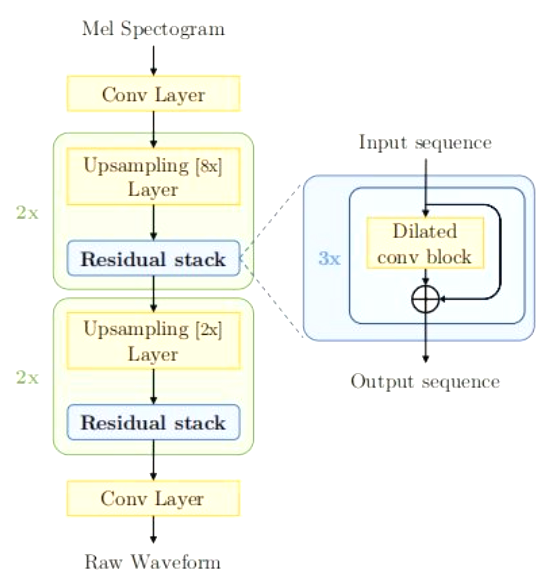

Upsampling Layer 是透過 ConvTranspose1d來實現, 在 Keras的Layer中也有一個叫做 Upsampling的Layer, 但他只是單純的把輸入 Repeat 2次,並沒有任何參數可以訓練

In [2]:
import numpy as np
test_inp= np.array([[[0.0,1.0,2.0],[3.0,4.0,5.0],[6.0,7.0,8.0]]])
test_inp

array([[[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]]])

In [4]:
from tensorflow.keras.layers import UpSampling1D
UpSampling1D(input_shape=(3,3))(test_inp)

<tf.Tensor: shape=(1, 6, 3), dtype=float32, numpy=
array([[[0., 1., 2.],
        [0., 1., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [6., 7., 8.],
        [6., 7., 8.]]], dtype=float32)>

ConvTranspose 是在正向與反向傳播中做與Conv相反的運算, 因此若先過了一層Conv,再過ConvTranspose之後就可以得到與原始輸入大小一樣的feature Map, 他的 Upsampling指的就會是對feature Map做的 Upsampling, 而不是對原始的輸入

In [5]:
from tensorflow.keras.layers import Conv1D,Conv1DTranspose
from tensorflow.keras.initializers import ones
import numpy as np

In [12]:
test_inp = np.ones((1,3,3))*2
test_inp = np.array([[[0.0,1.0,2.0],[3.0,4.0,5.0],[6.0,7.0,8.0]]])
test_inp

array([[[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]]])

Filter 大小為 3, 用來與 input 進行 convolution 計算, 得到feature map, 即是這個 convolution計算的結果, 內涵從 Input萃取出來的資訊, 但維度會降低

In [13]:
res = Conv1D(3,3,kernel_initializer=ones,bias_initializer='zero')(test_inp)
# (0+1+...+8)
res

<tf.Tensor: shape=(1, 1, 3), dtype=float32, numpy=array([[[36., 36., 36.]]], dtype=float32)>

再過 Conv1DTranspose 後輸出的維度就回到跟 Input一樣了

In [15]:
res_c = Conv1DTranspose(3,3,kernel_initializer=ones,bias_initializer='zero')(res)
#(36+36+36)
res_c

<tf.Tensor: shape=(1, 3, 3), dtype=float32, numpy=
array([[[108., 108., 108.],
        [108., 108., 108.],
        [108., 108., 108.]]], dtype=float32)>

靠 hop_length 決定怎麼Unsampling比較合理|

因為 MelGan用的輸入聲音 Sampling rate 為 22.05Khz, 而他的 n_fft=1024, 和librosa 預設不同, 所以 hop_length=256, 看一下上面 Upsampleing數等於

[8X]x[8X]x[2X]x[2X] = 256

* 最後的 Conv 是 1x1 加上 tanh的 Activate, 輸出範圍在 [-1~1]來滿足取值範圍

# Discriminator

* 輸入是 Ground_truth waveform + Generator 生成的 waveform

* 在 MelGan 裡面用到的 discriminator 是 multi-scale discriminator, 這種架構就是原本只用一個 discriminator 改為 N個, 然後把輸入做 average pooling , 送到各個 discriminator(如下圖所示), 這樣做的原因是 **MelGan 假設了接收不同 scale資料的 discriminator 可以學習到不同頻率的特徵**

* 每個 discriminator 的結構如下圖所示, 這邊的 DownSampling 一樣不是 keras.layer裡面的, 只是單純用 Conv 然後 stride 控制 DownSampling 的 shape而已, 接著只拿最後一層的 Output 跟倒數第二層的 Feature maps 去算 [hinge loss](https://zh.wikipedia.org/wiki/Hinge_loss)

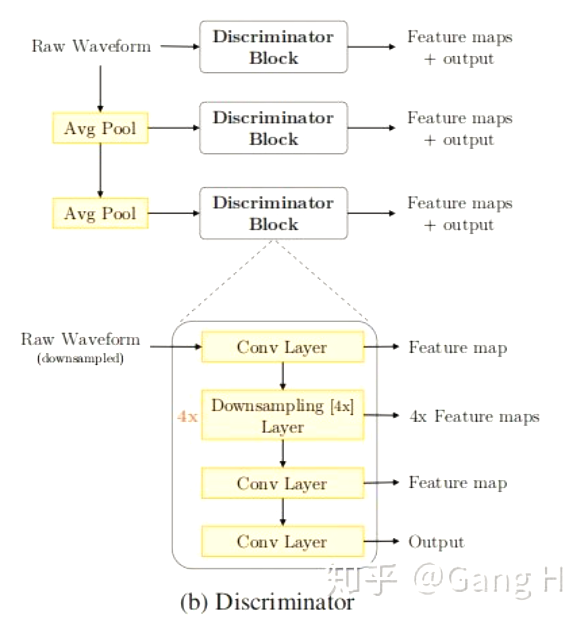|

* 最後拿 Loss 去最小化 Ground_truth 與 1 的差距, 以及 Generator 生成的 waveform與0的差距, 讓Generator 生出來的資料騙過 discriminator就完成了(訓練這樣的東西在 V100上面要訓練半個月)

已經有訓練好的可以使用

[官方Github](https://github.com/descriptinc/melgan-neurips)

包含 Pre-trained model

# Interface

在使用之前,先確保 waveform資料經過了處理,且 sampling_rate 是 22.05khz

In [ ]:
# 不是 22.05khz的話先 resample
import librosa
x= librosa.resample(x,fs,target_fs)
def mel_gan_handler(x, fft_length = 1024, hop_length = 256,sr = 22050):
    wav = normalize(x)
    p = (fft_length - hop_length) // 2
    wav = np.squeeze(np.pad(wav, (p, p), "reflect"))
    fft = librosa.stft(
                       wav, 
                       n_fft = fft_length, 
                       hop_length = hop_length,
                       window = 'hann',
                       center = False
                     )
    # 這裡的 abs 是 sqrt(實部**2 + 虛部**2)
    mag = abs(fft)
    mel_basis = mel(sr, 1024, fmin = 0.0 , fmax=None, n_mels=80)
    mel_output = np.dot(mel_basis,mag)
    log_mel_spec = np.log10(np.maximum(1e-5,mel_output)).astype(np.float32)
    return log_mel_spec

注意: 這裡輸入的 mel shape=(1,80,x) 而且是 torch tensor

In [ ]:
import IPython.display as ipd
import torch
import numpy as np
from interface import *
vocoder = MelVocoder()
audio = np.squeeze(vocoder.inverse(mel).cpu().numpy())
ipd.Audio(audio,rate=22050)

# Speaker Identification 介紹與 D_VECTOR實作

## 舊時代的 Speaker Identification

在深度學習之前, 已經出現用 [高斯混和模型(GMM)](https://blog.csdn.net/weixin_38206214/article/details/81084456)的方法,此模型是由多個[高斯分布](https://zh.wikipedia.org/wiki/%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83)的線性組合而成,這個方法在理論上是可以擬和所有類型分布
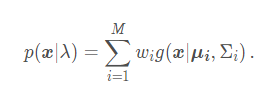

有了GMM之後又延伸出了[i-vector演算法](https://www.twblogs.net/a/5b7d54d92b71770a43deac0e),相對於GMM這種生成模型是類別確定的(類別之外的無法被GMMt處理), i-vector轉而去尋找hidden variable space,讓每個人都是這個空間裡的一員

[參考論文](https://etd.lis.nsysu.edu.tw/ETD-db/ETD-search/getfile?URN=etd-0809116-110726&filename=etd-0809116-110726.pdf)

## 新時代的Speaker Identification

接下來要介紹的D_VECTOR只有純粹的DNN架構, 沒有任何複雜的機率模型,大大降低了這項任務的門檻, 儘管用DNN去學到的東西跟 i-vector是相同的, 都是在尋找 hidden variable space,然而D_VECTOR的模型架構卻十分簡單
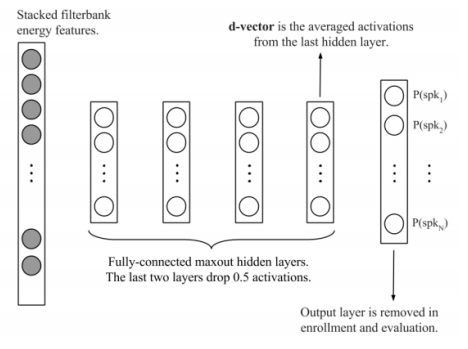

In [1]:
def build_model(input_size,hidden_size=256,n_class=5):
    model=Sequential([
        Dense(hidden_size,input_shape=(input_size,)),
        Activation('relu'),
        #############
        Dense(hidden_size),
        Activation('relu'),
        Dropout(0.5),
        Dense(hidden_size),
        Activation('relu'),
        Dropout(0.5),
        #D_VECTOR的源頭在下面這層提出來
        Dense(dim_emb,name='class_dense'),
        Activation('softmax')
        ]
    )
    return model

* 在訓練的時候輸入 x 就是語音的特徵(梅爾倒頻係數), 目標 y 則是類別標籤, loss 採用 categorical_crossentropy

* 在評估的時候輸入 x 只通過最後一層Dense 再把結果做 [L2 norm](https://ithelp.ithome.com.tw/articles/10221132)然後累加出來做平均(或是PCA)練成D_VECTOR, 也就是 Speaker Embedding

* 當然 D_VECTOR的模型也有許多變體, 可以把 Dense改成LSTM , 或是用 Convolution 去達成

## 評估 D_VECTOR 成效
找 N個不同人, 模型照這 N 個仁訓練
1. 從N個人的測試資料集算出平均的D_VECTOR
2. 從N個人再取不在資料集的語音算D_VECTOR
3. 計算兩 D_VECTOR的 [Cosine距離](https://zh.wikipedia.org/wiki/%E4%BD%99%E5%BC%A6%E7%9B%B8%E4%BC%BC%E6%80%A7),各自對應的都該是最短距離

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

result = []
# ave_dv 有 5人的平均 D_VECTOR
for test_dv in ave_dv:
    tmp=[]
    # valid_dvs 有 5 人不再資料集的D_VECTOR
    for valid_dv in valid_dvs:
        res=cosine_similarity([test_dv],[valid_dv])
        tmp.append(res)
    result.append(tmp)

# 聲音轉換面離的主要問題
1. 大部分語音轉換系統都假設有並行訓練數據, 就是兩個說話的人必須要說出相同句子的語音對, 無法接受非並行數據的訓練, 這樣的聲音轉換任務上就出現第一道門檻-資料蒐集與對齊困難

2. 在少數能處理非並行數據的現有算法中, 能夠用多對多轉換的算法又更少,但也有像 CycleGAN,StarGAN-VC 可做到

3. 而在 AutoVC(2019) 出現以前, **沒有任何語音轉換系統能夠執行零樣本轉換** ,就是僅通過觀察一個沒聽過的人的少數話語就可以轉換成另一個人的聲音

## 解決非並行數據的方法

* 一段聲音訊號中包含很多不同面向的資訊, 其中有講話內容、說話的人, 若可以把一段聲音"說話的人"的資訊以及 "講話內容"的資訊給取出來, 就可以隨意組合出想要的內容,也完全不用管訓練內容是否並行(這種作法也被稱為 Feature Disentangle), 例如 D_VECTOR 就是萃取出"說話的人"的資訊模型

* 以下 AutoVC架構, 其中 Content Encoder 跟 Decoder 就是一組 AutoEncoder

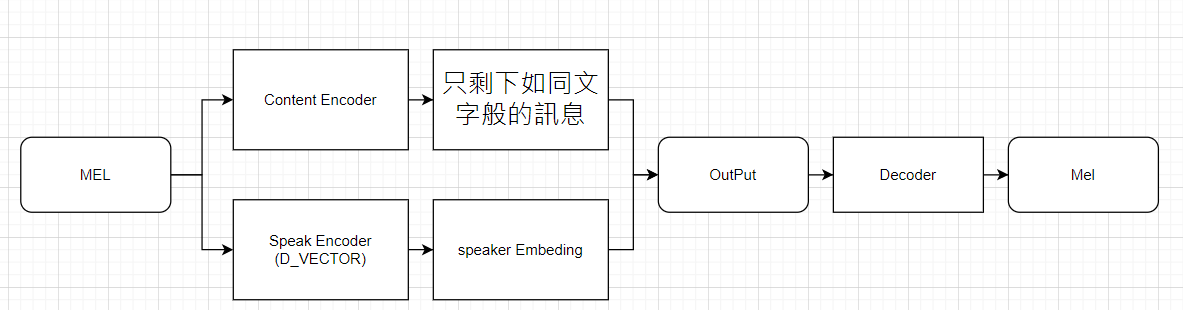

* 然而 CycleGAN 與 StarGAN-VC的做法並非這樣做, 在訓練的時候就希望能夠從 A 的聲音轉成B , 也正因為這樣的原因, 兩者無法昨到零樣本轉換, [作法](http://www.kecl.ntt.co.jp/people/kaneko.takuhiro/projects/cyclegan-vc/) 和處理影像的時候一樣, 只是資料換成聲音

## 聲音轉換的問題描述

假設語音是由以下隨機過程產生

**說話的人 U 是從群體 pU(.) 中抽取的隨機變量**

內容是指語音和韻律信息

**內容向量 Z = Z(1:T) 是由聯合內容分布 pZ(.) 得出的隨機過程**

在給定說話的人身份和內容的情況下, X(t) 就可以代表語音波型的一個樣本, 或者語音頻譜圖的一幀

**語音片段 X = X(1:T) = pX(.|U,Z) 表示發出 Z 內容的說話人語音分布情況**

接著再假設大家說話長度一樣

**H(X|U=u) = hspeech = constant**

現在, 假設兩組變量(U1,Z1,X1) 和 (U2,Z2,X2) 是獨立且同分布的隨機樣本則(U1,Z1,X1)屬於原說話的人, (U2,Z2,X2) 屬於目標說話的人

## 聲音轉換模型的目標就是設計一個轉換器, 他產生轉換輸出 X1->X2 , 保留 X1 中的"講話內容"(Z1), 但匹配目標"說話的人" 的聲音特徵(X2)

理想的語音轉換器應該具有以下理想性質

**pX^1->2 (.|U2=u2,Z1=z1) = pX(.|U=u2,Z=z1)**

* 當 U1 和 U2 都出現在訓練集中時, 問題就是一個標準的多說話人轉換問題, 已經有一些模型解決這個問題

* 當 **U1 或 U2 不在訓練集中**時,問題就變成了零樣本語音轉換問題, 這就是 AutoVC 解決的困難

# AutoVC 框架

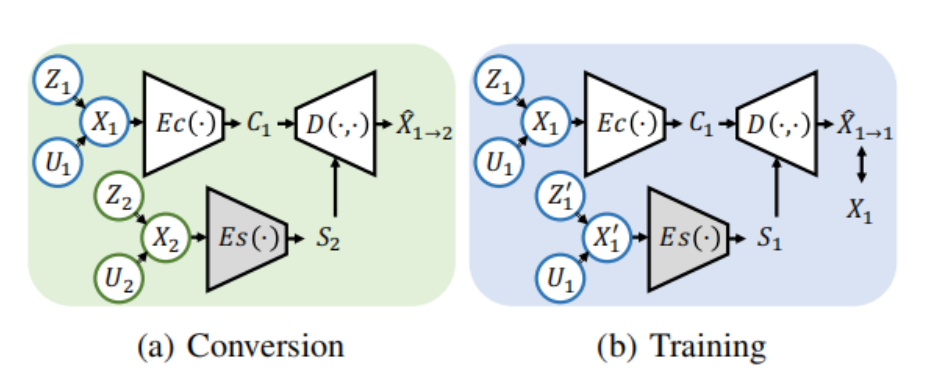

* AutoVC 是由上圖三個 model 所組成,

1. 內容編碼器 Ec(.) 產生從語音中嵌入的內容
2. 語者編碼器 Es(.) 產生從語音中嵌入的, (這邊用的是 pretrain model, 也就是D_VECTOR)
3. 解碼器 D(.,.) 產生從內容和語者嵌入的語音

## 在轉換和訓練,這些model 的輸入是不同的

* (a) 訓練期間: 來源語音(X1) 被送入內容編碼器 Ec(.), **來源語音的另一段聲音(X1')** 送入語者編碼器 Es(.), 最後解碼器跟內容編碼器最小化 reconstruction error(見下面說明)

* (b) 轉換期間: 來源語音(X1) 被送入內容編碼器 Ec(.), 目標與者的語音(X2) 送入語者編碼器 Es(.), 最後解碼器產生轉換結果

## What is reconstruction error and Why this work?

* 下面是在 Autovc 裏頭用的 loss function

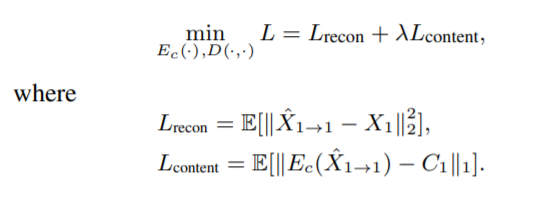

其中

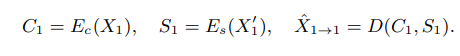

* reconstruction error 就是經過 Decoder 後的預測輸出跟真實的 MSE

* content error 則是把經過 Decoder 後的預測輸出丟進 Encoder 然後跟把真實的丟進 Encoder後的輸出做 MAE

In [ ]:
encoder_out = encoder(x)
decoder_out = decoder(encoder_out)
# reconstruction error
L_recon = mse_loss(x_real,x_decoder)
# content error
code_reconst = encoder(decoder_out)
L_content = mae_loss(encoder_out,code_reconst)

## 以下說明這 Loss 為什麼有用

同一個人說不同的話, 他們的 speaker Embedding 假設 D_VECTOR 會處理到**一模一樣**

**if U1 = U2 then Es(X1) = Es(X2)**

不同的人講的話(不管內容是否一樣), 他們的 speaker Embedding 我們假設 D_VECTOR 會處理到 **完全不一樣**

**if U1 != U2 then Es(X1) != Es(X2)**

{X1(1:T)} 是有限的二階矩陣遍歷(order-T) 的 [馬爾可夫過程](https://zh.wikipedia.org/wiki/%E9%A6%AC%E5%8F%AF%E5%A4%AB%E9%81%8E%E7%A8%8B),即

**pX1(t)(.|X1(1:t-1),U1) = pX1(t)(.|X1(t-t':t-),U1)**

進一步可以假設 X1 是有限基數, 將 n 表示為 C1 的維度, 則 n為

**n= n'+T^2/3 where n' is the optimal coding length of pX1(.|U1)^2**

那麼下方的假設就成立了:

1. 對於每個 T, 存在一個內容編碼器 Ec*(.:T) 和解碼器 D*(.,.:T)

2. limT -> ∞ L = 0 , KL 就是 KL-divergence

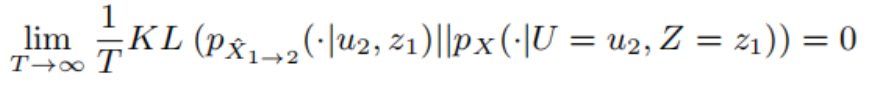

這說明了如果幀數 T 足夠大, 且 n(瓶頸維度)設置得當時, 則 loss function 將近似於理想轉換

**pX^1->2(.|U2 = u2, Z1 = z1) = pX(.|U = u2, Z = z1)**

## 更直觀的解釋 dim_neck

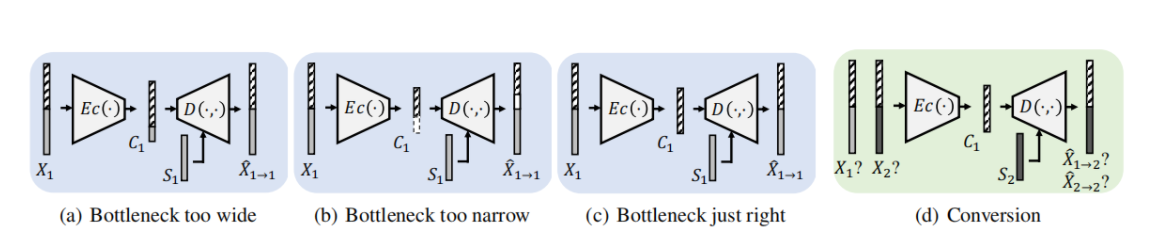

* 一段語音裡包含了兩種訊息- 語者的特徵(塗滿灰色)以及說的內容(斜線)

    (a)->(c) 在訓練時目標跟來源都是一樣的人
    
    (a) 當瓶頸太寬時, 內容會包含一些來源語者的特徵
    (b) 當瓶頸過窄時, 內容會丟失, 導致重構不完善
    (c) 當瓶頸剛好時, 可以實現完美的重構, 嵌入的內容不包含來源語者特徵
    (d) 實際轉換過程中, 輸出不應包含來源語者的特徵, 因此轉換質量應與進行自我重構時一樣高

# 放大一點來看 AutoVC結構

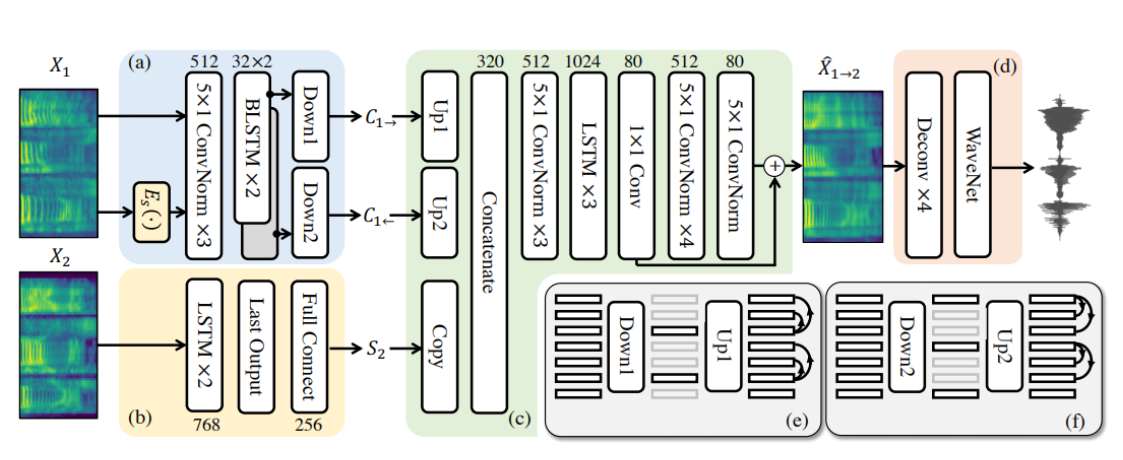

* (a) 內容編碼器

 1. 輸入: 80維的梅爾倒頻譜圖 X1 與語者特徵 Es(X1) concatenate
 
 2. 進 3個 5X1 的 Conv+BN+ReLU, out_put_channel = 512
 
 3. 進 2個 cell = 32的 BLSTM(合起來 = 64)
 
## 接著進行對 bottleneck的下採樣, 這兩個就是輸出
 
**dim_neck = 3**

**# 以上圖(e)來看的話 dim_neck = 3**

**out_forward = outputs[:, :, :dim_neck]**

**# 實際上的實驗結果, dim_neck 的設定我覺得是**

**(sample_rate/1000)*2**

* (b) 語者編碼器(這個是沒有要訓練的-D_VECTOR)

    根據前面的假設, 語者編碼器的目標是對同一個人的不同話語產生相同的嵌入, 對不同的則產生不同的嵌入, 在傳統的多對多語音轉換, 這一步只需要 one-hot encoding 就可以了, 但這裡要達成零樣本轉換的話, Auto_VC 參考了 [Generalized end-to-end loss for speaker verification](https://arxiv.org/pdf/1710.10467.pdf) 中的設計
    
* (c) 解碼器

    輸入: 內容編碼器的輸出**個別再採樣**加上語者編碼器的輸出 Copy T次總共 3個 concatenate
    
    1. 進 3個 5x1 Conv+BN+ReLU, out_put_channel = 512
    
    2. 進 3個 cell = 1024 的 LSTM
    
    3. 進 1個 1x1 Conv,out_put_channel = 80 這邊是**第一個輸出**
    
    4. 進 4個 5x1 Conv+BN+ReLU,out_put_channel = 512
    
    5. 進 1個 5x1 Conv+BN+ReLU,out_put_channel = 80 這邊是**第二個輸出**
    
    6. 最後輸出 = 第一個輸出+第二個輸出
    
 最後把得到的 MEL 轉回 Waveform 就完成了, 因此要特別注意的是拿來訓練 Auto_VC 的 MEL 就已經是可以用 MelGan 或其他 Vocoder 轉換的 MEL 了

In [ ]:
https://ithelp.ithome.com.tw/m/articles/10262975